In [147]:
import numpy as np;
import pandas as pd;

do = pd.read_csv('./datasets/despesa_orcamentaria_abril18.csv', ';');

do['Valor'] = do['Valor'].str.strip()

do['Valor'] = do['Valor'].str.replace(".", "").str.replace(",", ".").astype(float)



In [12]:
fornecedores = do.groupby(['Fornecedor'])['Valor'].agg(
  lambda x : x.sum()
).sort_values(axis=0, ascending=False)

print(fornecedores);

Fornecedor
FOLHA DE PAGAMENTO                                    1699359.94
INSTITUTO DE PREVIDENCIA DO MUNICIPIO DE PARAIBUNA     404891.67
MINISTERIO DA FAZENDA                                  130000.00
MARIA APARECIDA DA SILVA FORTUNATO-CONSTRUCOES-EPP      91256.25
WORKS INFORMATICA COMERCIAL LTDA                        51200.00
BELLOTON COMERCIAL EIRELI EPP                           46463.00
CAEPA -COMPANHIA DE AGUA E ESGOTO DE PARAIBUNA S/A      37950.00
CGMP- CENTRO DE GESTAO DE MEIOS DE PAGAMENTOS- S.A      36000.00
INSTITUTO NACIONAL DO SEGURO SOCIAL                     35088.65
TIGS SERVICOS LTDA EPP                                  33929.64
THIPLAN COMERCIAL LTDA EPP                              32773.03
PAULO AUGUSTO GABRIEL STABILE DA COSTA - ME             30708.63
AUDIO SERVICE LOCACAO E COMERCIO LTDA                   27000.00
CONSORCIO INTERMUNICIPAL TRES RIOS                      27000.00
UNIMAQUINAS FERRAMENTAS E EQUIPAMENTOS LTDA - ME        25079.55
J C B MATERIAI

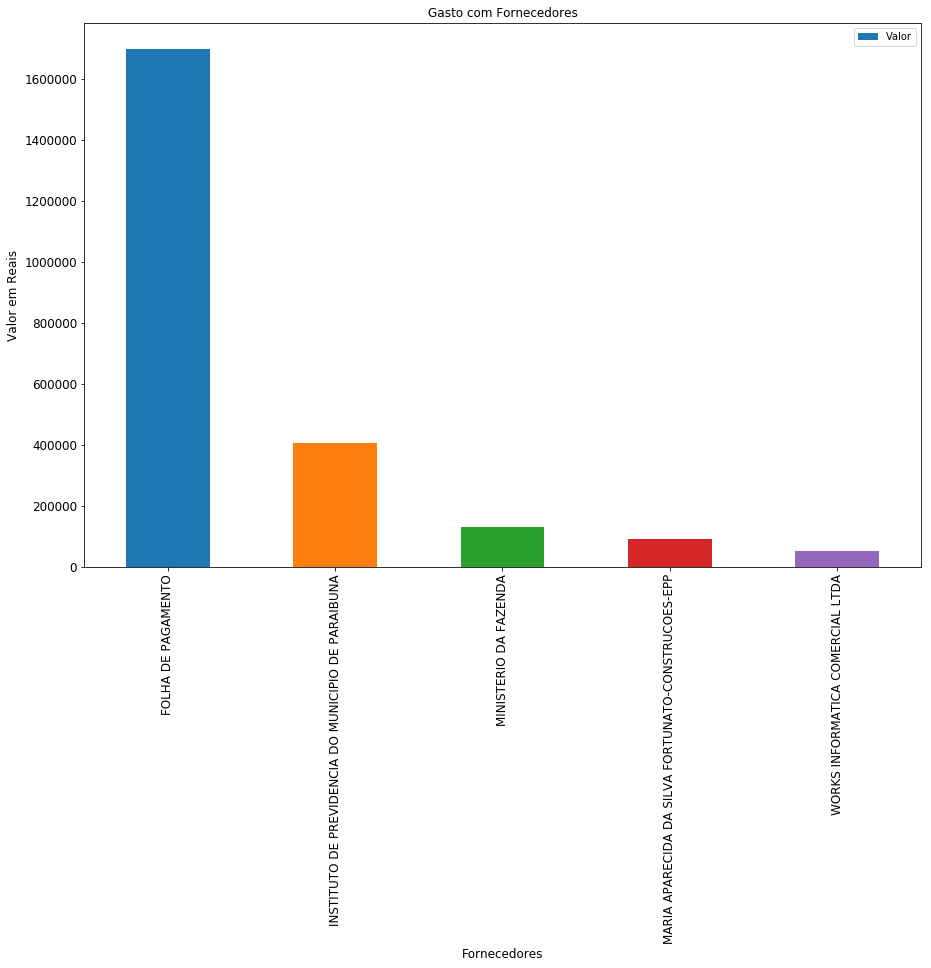

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

ax = fornecedores.head(5).plot(kind='bar', title ="Gasto com Fornecedores - Cinco maiores", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Fornecedores", fontsize=12)
ax.set_ylabel("Valor em Reais", fontsize=12)
plt.show()

In [14]:
print(do[do['Processo'].str.match('.*717\/2018') == True])

           Empenho        Data                        Fornecedor  \
170  3437-000/2018  22/05/2018  WORKS INFORMATICA COMERCIAL LTDA   

     Unidade Orcamentaria            Unidade Executora  \
170  SERVICOS DE EDUCACAO  SETOR DE ENSINO FUNDAMENTAL   

                                   Programa                  Modalidade  \
170  GESTOES DE DESENVOLVIMENTO DA EDUCACAO  Convite Compras e Servicos   

      Processo    Valor  
170   717/2018  51200.0  


(-1.116021641175505,
 1.1178215121919857,
 -1.1208492094785476,
 1.1101805821199866)

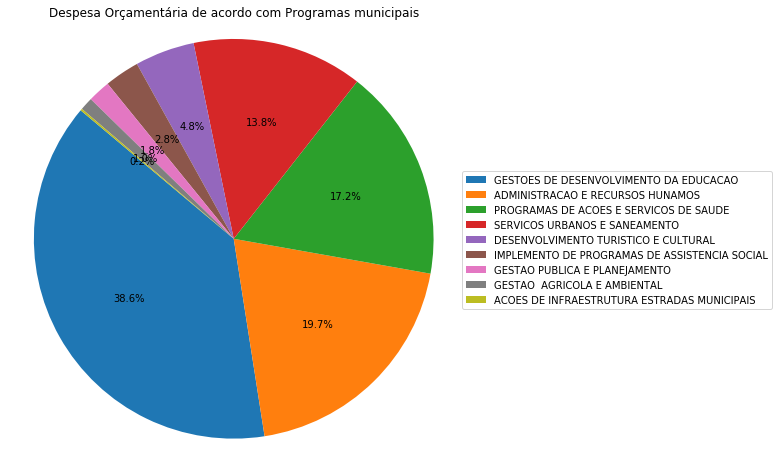

In [150]:
investimento = do.groupby('Programa')['Valor'].agg(
  lambda x : x.sum()
).sort_values(axis=0, ascending=False)

fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(111)

labels = investimento.keys()
sizes = investimento

patches, texts, autopct = ax.pie(sizes, autopct='%1.1f%%', shadow=False, startangle=140)
# plt.legend(patches, labels, loc="upper right")
ax.legend(patches, labels, loc="center left" ,
          bbox_to_anchor=(1, 0, 0.5, 1))
ax.set_title("Despesa Orçamentária de acordo com Programas municipais")
ax.axis('equal')